# Introdução

Esse conjunto de dados representa uma plataforma integrada de lojistas e marketplaces para venda de comidas no varejo brasileiro, representando os dados de pedidos, entregas e seus intermediários entre os meses de janeiro e abril de 2021. Ele está disponível no Kaggle, sem a inteireza dos dados para preservar a privacidade dos envolvidos, no link: https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?select=channels.csv. 
<strong>Esse conjunto demonstra como as decisões de negócio passaram a ser cada vez mais guiadas pelos dados gerados pelos envolvidos nas transações comerciais na medida em que eles permitem entender o comportamento real e potencial das empresas e os hábitos de consumo dos clientes. Os dados disponíveis auxiliam a aumentar a eficiência da empresa e a satisfação dos usuários. Mais ainda, eles permitem que eu treine as minhas aptidões com as bibliotecas Numpy, Pandas, Matplotlib e Seaborn</strong>.

Ele é formado por diferentes datasets. São elas:
- channels: este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os produtos dos lojistas.
- deliveries: este dataset possui informações sobre as entregas realizadas pelos entregadores parceiros.
- drivers: este dataset possui informações sobre os entregadores.
- hubs: Este dataset possui informações sobre os hubs (centros de distribuição dos pedidos da onde saem as entregas).
- orders: este dataset possui informações sobre as vendas processadas através da plataforma.
- payments: este dataset possui informações sobre os pagamentos realizados.
- stores: este dataset possui informações sobre os lojistas que utilizam a plataforma para vender seus itens.

As perguntas a seguir intentam responder à um desafio do clube Universidade dos Dados: 
- Suponha que, em uma ação de marketing, para atrair mais entregadores, vamos dar uma bonificação para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover. É preciso levantar, então, essas informações. 
- O time de Pricing precisa ajustar os valores pagos aos entregadores. Para isso, eles precisam da distribuição da distância média percorrida pelos motoqueiros separada por estado, já que cada região terá seu preço.

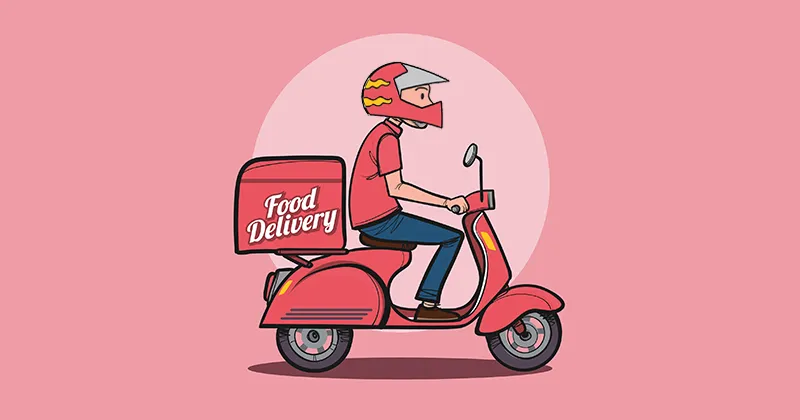

Importando as bibliotecas necessárias:

In [1]:
# Bibliotecas para tratamento de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualizaçõo de dados
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['axes.labelsize'] = 5
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# Ignorar os avisos de alerta
import warnings
warnings.filterwarnings('ignore')

# Visualizar todas as colunas
pd.set_option('display.max_columns', None)

# Visualizar 15 linhas no máximo
pd.set_option('display.max_rows', 15)

Importando o dataset:

In [2]:
deliveries = pd.read_csv('deliveries.csv')
print(deliveries.head())

   delivery_id  delivery_order_id  driver_id  delivery_distance_meters  \
0      2174658           68413340     8378.0                    5199.0   
1      2174660           68414309     2473.0                     410.0   
2      2174661           68416230     7615.0                    3784.0   
3      2174663           68412721     8378.0                    5714.0   
4      2174675           68414018    10463.0                    3746.0   

  delivery_status  
0       DELIVERED  
1       DELIVERED  
2       DELIVERED  
3       DELIVERED  
4       DELIVERED  


In [3]:
drivers = pd.read_csv('drivers.csv')
print(drivers.head())

   driver_id driver_modal        driver_type
0        133      MOTOBOY  LOGISTIC OPERATOR
1        138      MOTOBOY          FREELANCE
2        140      MOTOBOY          FREELANCE
3        143        BIKER          FREELANCE
4        148      MOTOBOY          FREELANCE


Verificando suas dimensões:

In [4]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  int64  
 1   delivery_order_id         378843 non-null  int64  
 2   driver_id                 362957 non-null  float64
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 14.5+ MB


In [5]:
f'O conjunto de dados da tabela "deliveries" tem {deliveries.shape[0]} linhas e {deliveries.shape[1]} colunas. \
Isto é, {deliveries.shape[0]} entregas, com {deliveries.shape[1]} atributos sobre cada uma delas.'

'O conjunto de dados da tabela "deliveries" tem 378843 linhas e 5 colunas. Isto é, 378843 entregas, com 5 atributos sobre cada uma delas.'

In [6]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB


In [7]:
f'O conjunto de dados da tabela "drivers" tem {drivers.shape[0]} linhas e {drivers.shape[1]} colunas. \
Isto é, {drivers.shape[0]} entregadores, com {drivers.shape[1]} atributos sobre cada um deles.'

'O conjunto de dados da tabela "drivers" tem 4824 linhas e 3 colunas. Isto é, 4824 entregadores, com 3 atributos sobre cada um deles.'

O tipo de dados da coluna "driver_id" no dataset "deliveries" está como float64 ao passo que, no dataset "drivers", está como int64. Transformando a coluna da primeira em int64 pois faz mais sentido tê-la dessa forma:

In [8]:
deliveries['driver_id'] = deliveries['driver_id'].astype('Int64')
print(deliveries['driver_id'].head())

0     8378
1     2473
2     7615
3     8378
4    10463
Name: driver_id, dtype: Int64


Juntando essas duas tabelas a fim de ter as informações "driver_id" e "delivery_distance_meters" na mesma tabela:

In [9]:
deliveries_drivers = deliveries.merge(drivers, how = 'inner', on = 'driver_id')
print(deliveries_drivers.head())

   delivery_id  delivery_order_id  driver_id  delivery_distance_meters  \
0      2174658           68413340       8378                    5199.0   
1      2174663           68412721       8378                    5714.0   
2      2175006           68424238       8378                    5389.0   
3      2175302           68423436       8378                    5052.0   
4      2175636           68457718       8378                    3249.0   

  delivery_status driver_modal driver_type  
0       DELIVERED      MOTOBOY   FREELANCE  
1       DELIVERED      MOTOBOY   FREELANCE  
2       DELIVERED      MOTOBOY   FREELANCE  
3       DELIVERED      MOTOBOY   FREELANCE  
4       DELIVERED      MOTOBOY   FREELANCE  


Checando suas informações unidas:

In [10]:
deliveries_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362957 entries, 0 to 362956
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               362957 non-null  int64  
 1   delivery_order_id         362957 non-null  int64  
 2   driver_id                 362957 non-null  Int64  
 3   delivery_distance_meters  362928 non-null  float64
 4   delivery_status           362957 non-null  object 
 5   driver_modal              362957 non-null  object 
 6   driver_type               362957 non-null  object 
dtypes: Int64(1), float64(1), int64(2), object(3)
memory usage: 19.7+ MB


Olhando para os valores nulos:

In [11]:
deliveries_drivers.isnull().sum()

delivery_id                  0
delivery_order_id            0
driver_id                    0
delivery_distance_meters    29
delivery_status              0
driver_modal                 0
driver_type                  0
dtype: int64

Existem 29 valores nulos para "delivery_distance_meters". Analisando, primeiro, as quantidades e proporções das variáveis "driver_type", "driver_modal" e "delivery_status":

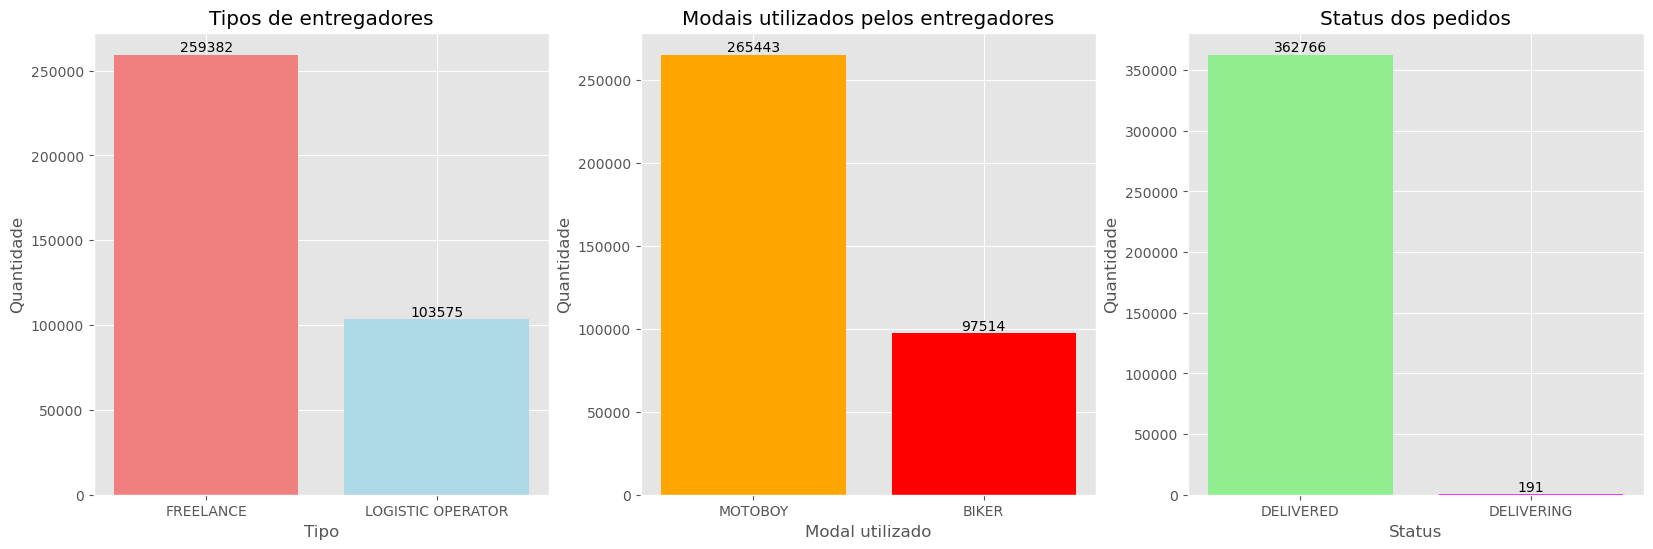

In [12]:
# Dimensionamento do gráfico
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

# Gráfico de coluna 1
axes[0].bar(x = deliveries_drivers['driver_type'].value_counts().index, 
            height = deliveries_drivers['driver_type'].value_counts().values, 
            color = ['lightcoral', 'lightblue'])
axes[0].set_title('Tipos de entregadores')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Quantidade')
for i, v in enumerate(deliveries_drivers['driver_type'].value_counts()):
    axes[0].text(i, v, str(v), ha = 'center', va = 'bottom')

# Gráfico de coluna 2
axes[1].bar(x = deliveries_drivers['driver_modal'].value_counts().index, 
            height = deliveries_drivers['driver_modal'].value_counts().values, 
            color = ['orange', 'red'])
axes[1].set_title('Modais utilizados pelos entregadores')
axes[1].set_xlabel('Modal utilizado')
axes[1].set_ylabel('Quantidade')
for i, v in enumerate(deliveries_drivers['driver_modal'].value_counts()):
    axes[1].text(i, v, str(v), ha = 'center', va = 'bottom')
    
# Gráfico de coluna 3
axes[2].bar(x = deliveries_drivers['delivery_status'].value_counts().index, 
            height = deliveries_drivers['delivery_status'].value_counts().values, 
            color = ['lightgreen', 'magenta'])
axes[2].set_title('Status dos pedidos')
axes[2].set_xlabel('Status')
axes[2].set_ylabel('Quantidade')
for i, v in enumerate(deliveries_drivers['delivery_status'].value_counts()):
    axes[2].text(i, v, str(v), ha = 'center', va = 'bottom')

# Plotagem
plt.show()

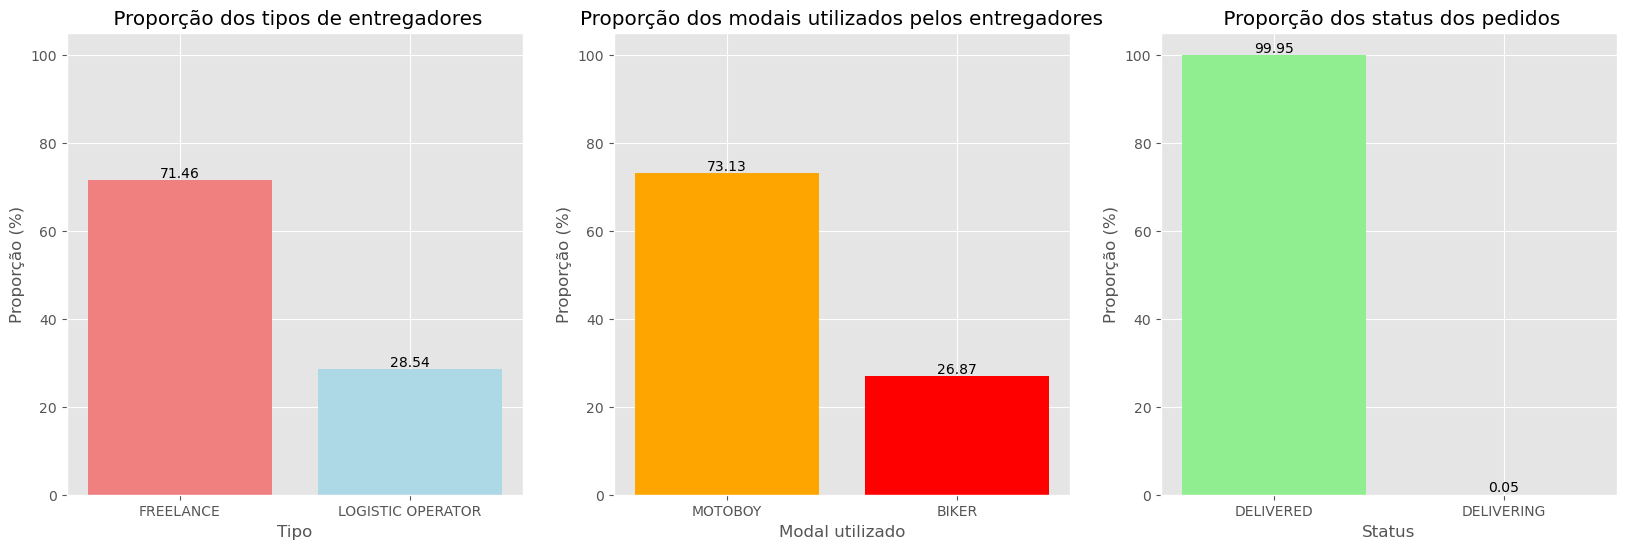

In [13]:
# Dimensionamento do gráfico
fig, axes = plt.subplots(1, 3, figsize = (20, 6))


# Gráfico de coluna 1
axes[0].bar(x = deliveries_drivers['driver_type'].value_counts().index, 
            height = deliveries_drivers['driver_type'].value_counts(1).apply(lambda x: round(x * 100, 2)).values, 
            color = ['lightcoral', 'lightblue'])
axes[0].set_title(' Proporção dos tipos de entregadores')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Proporção (%)')
axes[0].set_ylim(0, 105)
for i, v in enumerate(deliveries_drivers['driver_type'].value_counts(1).apply(lambda x: round(x * 100, 2))):
    axes[0].text(i, v, str(v), ha = 'center', va = 'bottom')
    
# Gráfico de coluna 2
axes[1].bar(x = deliveries_drivers['driver_modal'].value_counts().index, 
            height = deliveries_drivers['driver_modal'].value_counts(1).apply(lambda x: round(x * 100, 2)).values, 
            color = ['orange', 'red'])
axes[1].set_title('Proporção dos modais utilizados pelos entregadores')
axes[1].set_xlabel('Modal utilizado')
axes[1].set_ylabel('Proporção (%)')
axes[1].set_ylim(0, 105)
for i, v in enumerate(deliveries_drivers['driver_modal'].value_counts(1).apply(lambda x: round(x * 100, 2))):
    axes[1].text(i, v, str(v), ha = 'center', va = 'bottom')
    
# Gráfico de coluna 3
axes[2].bar(x = deliveries_drivers['delivery_status'].value_counts().index, 
            height = deliveries_drivers['delivery_status'].value_counts(1).apply(lambda x: round(x * 100, 2)).values, 
            color = ['lightgreen', 'magenta'])
axes[2].set_title(' Proporção dos status dos pedidos')
axes[2].set_xlabel('Status')
axes[2].set_ylabel('Proporção (%)')
axes[2].set_ylim(0, 105)
for i, v in enumerate(deliveries_drivers['delivery_status'].value_counts(1).apply(lambda x: round(x * 100, 2))):
    axes[2].text(i, v, str(v), ha = 'center', va = 'bottom')

# Plotagem
plt.show()

- 259382, ou aproximadamente 72%, dos entregadores são freelancers e 103575, ou aproximadamente 28%, são operadores de logística.
- 265443, ou aproximadamente 73% dos entregadores são motoboys e 97514, ou aproximadamente 27%, são ciclistas.
- Quase todos os pedidos registrados foram entregados.

Na medida que uma das demandas do trabalho necessita da distância percorrida, os pedidos registrados como "DELIVERING" serão retirados por não significarem que foram entregues efetivamente e que podem ainda ser cancelados, e porque representam uma parcela muito pequena dos dados:

In [14]:
deliveries_drivers = deliveries_drivers.loc[deliveries_drivers['delivery_status'] == 'DELIVERED']
print(deliveries_drivers['delivery_status'].unique())

['DELIVERED']


Voltando-se para os valores nulos da coluna "delivery_distance_meters":

In [15]:
deliveries_drivers[deliveries_drivers['delivery_distance_meters'].isnull()]

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type
2136,2468760,78412057,9996,NaN,DELIVERED,BIKER,FREELANCE
19540,3070479,92979697,25651,NaN,DELIVERED,MOTOBOY,LOGISTIC OPERATOR
53972,2730812,85460543,26223,NaN,DELIVERED,MOTOBOY,LOGISTIC OPERATOR
53977,2731107,85460543,26223,NaN,DELIVERED,MOTOBOY,LOGISTIC OPERATOR
55957,2838725,87516588,26223,NaN,DELIVERED,MOTOBOY,LOGISTIC OPERATOR
...,...,...,...,...,...,...,...
338797,2860979,87900114,53549,NaN,DELIVERED,MOTOBOY,LOGISTIC OPERATOR
339831,2950586,90067595,53450,NaN,DELIVERED,BIKER,FREELANCE
344736,2857804,87822908,50344,NaN,DELIVERED,MOTOBOY,FREELANCE
356078,3004372,91417502,59804,NaN,DELIVERED,MOTOBOY,LOGISTIC OPERATOR


Para ter uma melhor ideia do que fazer em relação aos valores nulos, a distribuição da variável é verificada:

In [16]:
from tabulate import tabulate
desc = deliveries_drivers['delivery_distance_meters'].describe().round(2)
desc['var'] = deliveries_drivers['delivery_distance_meters'].var()
desc['kurt'] = deliveries_drivers['delivery_distance_meters'].kurtosis()
desc = pd.DataFrame(desc)
print('Distribuição da variável "delivery_distance_meters":')
print(tabulate(desc, headers = 'keys', tablefmt = 'fancy_grid', showindex = True))

Distribuição da variável "delivery_distance_meters":
╒═══════╤════════════════════════════╕
│       │   delivery_distance_meters │
╞═══════╪════════════════════════════╡
│ count │           362737           │
├───────┼────────────────────────────┤
│ mean  │             2818.76        │
├───────┼────────────────────────────┤
│ std   │            18748.3         │
├───────┼────────────────────────────┤
│ min   │                0           │
├───────┼────────────────────────────┤
│ 25%   │             1172           │
├───────┼────────────────────────────┤
│ 50%   │             2044           │
├───────┼────────────────────────────┤
│ 75%   │             3419           │
├───────┼────────────────────────────┤
│ max   │                7.25129e+06 │
├───────┼────────────────────────────┤
│ var   │                3.51497e+08 │
├───────┼────────────────────────────┤
│ kurt  │           116889           │
╘═══════╧════════════════════════════╛


Percebe-se que existe uma grande assimetria à direita. Vendo a sua distribuição graficamente:

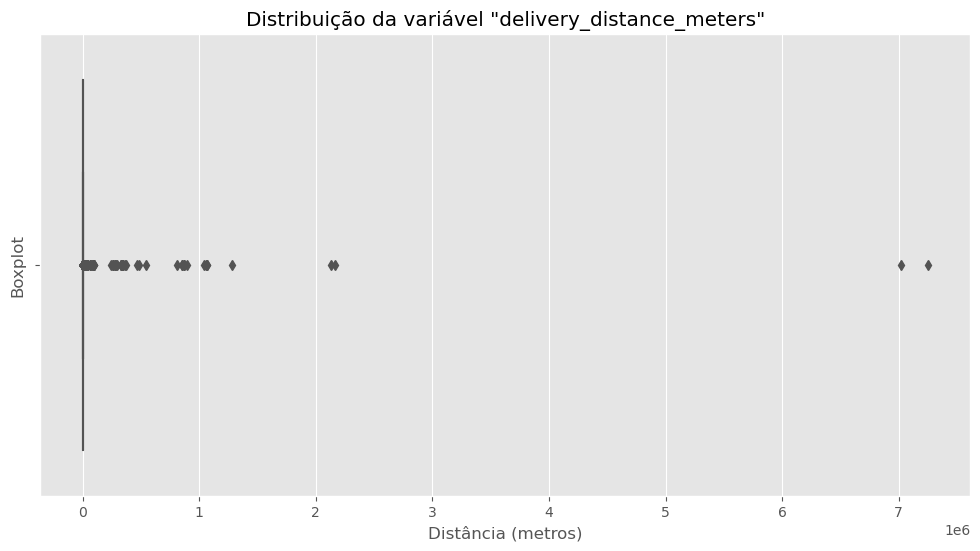

In [17]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (12, 6))

# Boxplot
sns.boxplot(data = deliveries_drivers, x = 'delivery_distance_meters')

# Legendas e estilizações
ax.set_title('Distribuição da variável "delivery_distance_meters"')
ax.set_ylabel('Boxplot')
ax.set_xlabel('Distância (metros)')

# Plotagem
plt.show()

Existem muitos outliers, com distâncias na ordem dos milhões de metros, ou dos milhares de quilômetros, o que é impossível para ser feito em uma entrega. Olhando para o percentil 99 e separando as observações que têm distâncias maiores do que as outras 99% das observações:

In [18]:
percentil_99 = deliveries_drivers['delivery_distance_meters'].quantile(0.99).round(2)
print(f'O percentil 99 é {percentil_99}. As observações maiores que ele são:')
print(deliveries_drivers.loc[deliveries_drivers['delivery_distance_meters'] > percentil_99])

O percentil 99 é 15763.28. As observações maiores que ele são:
        delivery_id  delivery_order_id  driver_id  delivery_distance_meters  \
373         2895249           88609618       8378                   16855.0   
1226        2798398           86849653       7615                   15860.0   
1248        2834425           87466210       7615                   19628.0   
2793        2243947           71005576       7396                   22587.0   
2794        2243958           71004889       7396                   24783.0   
...             ...                ...        ...                       ...   
362513      3065754           92774711      59485                   23968.0   
362514      3065761           92750417      59485                   26589.0   
362515      3066191           92832522      25498                   16184.0   
362517      3066204           92827481      25498                   16085.0   
362744      3080496           93106525      60846                  3

3628 pedidos registrados têm distâncias superiores a 15763.28 metros ou aproximadamente 16 km.

Atentando para a distribuição gráfica das medidas de posição e dispersão de acordo com o modal utilizado porque é de se esperar que a distância percorrida por um motoboy seja diferente daquela percorrida por um ciclista:

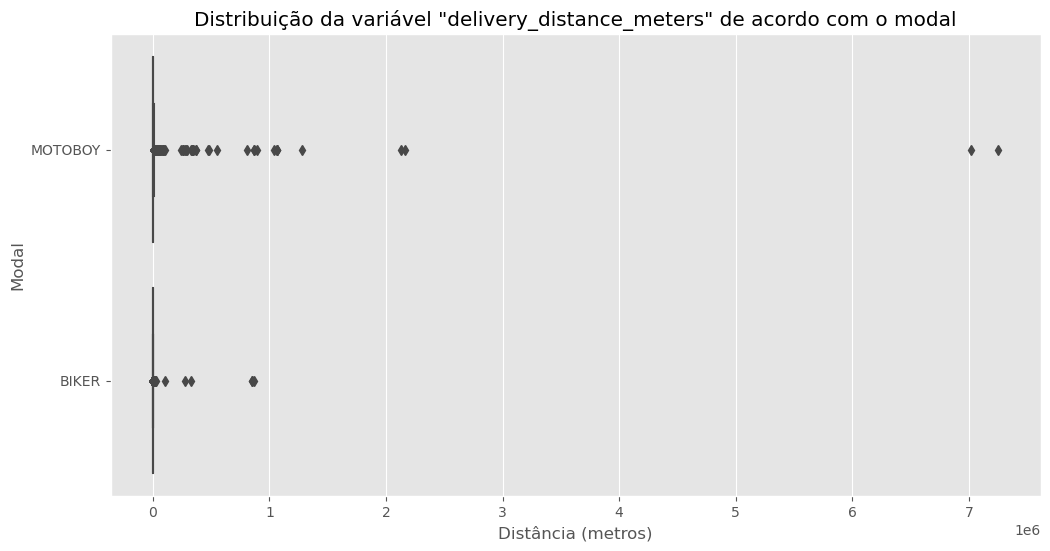

In [19]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (12, 6))

# Boxplot
sns.boxplot(data = deliveries_drivers, x = 'delivery_distance_meters', y = 'driver_modal')

# Legendas e estilizações
ax.set_title('Distribuição da variável "delivery_distance_meters" de acordo com o modal')
ax.set_ylabel('Modal')
ax.set_xlabel('Distância (metros)')

# Plotagem
plt.show()

As entregas entre os motoboys são as que mais destoam. Separando os dados conforme o modal para entender quais são as entregas que possuem distâncias maiores do que 99% das outras:

In [20]:
print('Motoboys que percorrem uma distância maior do que 15763.28 metros:')
print(deliveries_drivers.loc[(deliveries_drivers['driver_modal'] == 'MOTOBOY') & \
                             (deliveries_drivers['delivery_distance_meters'] > percentil_99)])
print('Ciclistas que percorrem uma distância maior do que 15763.28 metros:')
print(deliveries_drivers.loc[(deliveries_drivers['driver_modal'] == 'BIKER') & \
                             (deliveries_drivers['delivery_distance_meters'] > percentil_99)])

Motoboys que percorrem uma distância maior do que 15763.28 metros:
        delivery_id  delivery_order_id  driver_id  delivery_distance_meters  \
373         2895249           88609618       8378                   16855.0   
1226        2798398           86849653       7615                   15860.0   
1248        2834425           87466210       7615                   19628.0   
2793        2243947           71005576       7396                   22587.0   
2794        2243958           71004889       7396                   24783.0   
...             ...                ...        ...                       ...   
362441      3088099           93115493      62913                   16078.0   
362513      3065754           92774711      59485                   23968.0   
362514      3065761           92750417      59485                   26589.0   
362515      3066191           92832522      25498                   16184.0   
362517      3066204           92827481      25498               

A maioria das observações que têm distância de entrega maior do que as outras 99% são aquelas nas quais os motoboys entregam. 12 observações são de ciclistas e a menor distância, entre eles, é 17433 metros, o que parece muito a ser percorrida com bicicleta. Essas últimas serão excluídas:

In [21]:
deliveries_drivers.drop(index = deliveries_drivers.loc[(deliveries_drivers['driver_modal'] == 'BIKER') & \
                                                       (deliveries_drivers['delivery_distance_meters'] > percentil_99)].\
                         index, inplace = True)

Importando, então, a base "orders" e "stores" para enxergar a relação das variáveis com os produtos que são entregados:

In [22]:
orders = pd.read_csv('orders.csv')
print(orders.head())

   order_id  store_id  channel_id  payment_order_id  delivery_order_id  \
0  68405119      3512           5          68405119           68405119   
1  68405123      3512           5          68405123           68405123   
2  68405206      3512           5          68405206           68405206   
3  68405465      3401           5          68405465           68405465   
4  68406064      3401           5          68406064           68406064   

  order_status  order_amount  order_delivery_fee  order_delivery_cost  \
0     CANCELED          62.7                 0.0                  NaN   
1     CANCELED          62.7                 0.0                  NaN   
2     CANCELED         115.5                 0.0                  NaN   
3     CANCELED          55.9                 0.0                  NaN   
4     CANCELED          37.9                 0.0                  NaN   

   order_created_hour  order_created_minute  order_created_day  \
0                   0                     1       

In [23]:
f'A tabela "orders" é formada por {orders.shape[0]} pedidos, com {orders.shape[1]} atributos.'

'A tabela "orders" é formada por 368999 pedidos, com 29 atributos.'

Vendo suas informações gerais:

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

Fazendo o mesmo para a outra tabela:

In [25]:
stores = pd.read_csv('stores.csv', encoding = 'ISO-8859-1')
print(stores.head())

   store_id  hub_id         store_name store_segment  store_plan_price  \
0         3       2            CUMIURI          FOOD               0.0   
1         6       3  PIMGUCIS DA VIVA           FOOD               0.0   
2         8       3          RASMUR S           FOOD               0.0   
3        53       8        PAPA SUCIS           FOOD               0.0   
4        54       8      VUZPI PAZZIS           FOOD               0.0   

   store_latitude  store_longitude  
0             NaN              NaN  
1      -30.037415       -51.203520  
2      -30.037415       -51.203520  
3      -22.921475       -43.234822  
4      -22.921475       -43.234822  


In [26]:
f'A tabela "stores" é formada por {stores.shape[0]} lojas, com {stores.shape[1]} características.'

'A tabela "stores" é formada por 951 lojas, com 7 características.'

Olhando suas informações gerais:

In [27]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          951 non-null    int64  
 1   hub_id            951 non-null    int64  
 2   store_name        951 non-null    object 
 3   store_segment     951 non-null    object 
 4   store_plan_price  836 non-null    float64
 5   store_latitude    935 non-null    float64
 6   store_longitude   935 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.1+ KB


Unindo todas:

In [28]:
df = deliveries_drivers.merge(orders, left_on = 'delivery_order_id', right_on = 'order_id').\
merge(stores, how = 'inner', on = 'store_id')
print(df.head())

   delivery_id  delivery_order_id_x  driver_id  delivery_distance_meters  \
0      2174658             68413340       8378                    5199.0   
1      2174663             68412721       8378                    5714.0   
2      2175302             68423436       8378                    5052.0   
3      2175636             68457718       8378                    3249.0   
4      2175640             68457071       8378                    3693.0   

  delivery_status driver_modal driver_type  order_id  store_id  channel_id  \
0       DELIVERED      MOTOBOY   FREELANCE  68413340       631           5   
1       DELIVERED      MOTOBOY   FREELANCE  68412721       631           5   
2       DELIVERED      MOTOBOY   FREELANCE  68423436       631           5   
3       DELIVERED      MOTOBOY   FREELANCE  68457718       631           5   
4       DELIVERED      MOTOBOY   FREELANCE  68457071       631           5   

   payment_order_id  delivery_order_id_y order_status  order_amount  \
0  

Confirmando suas informações gerais:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362754 entries, 0 to 362753
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   delivery_id                        362754 non-null  int64  
 1   delivery_order_id_x                362754 non-null  int64  
 2   driver_id                          362754 non-null  Int64  
 3   delivery_distance_meters           362725 non-null  float64
 4   delivery_status                    362754 non-null  object 
 5   driver_modal                       362754 non-null  object 
 6   driver_type                        362754 non-null  object 
 7   order_id                           362754 non-null  int64  
 8   store_id                           362754 non-null  int64  
 9   channel_id                         362754 non-null  int64  
 10  payment_order_id                   362754 non-null  int64  
 11  delivery_order_id_y                3627

Checando quais são os valores existentes na coluna "order_status":

In [30]:
df['order_status'].unique()

array(['FINISHED', 'CANCELED'], dtype=object)

Verificando as quantidades de pedidos que se dividem nessas duas categorias:

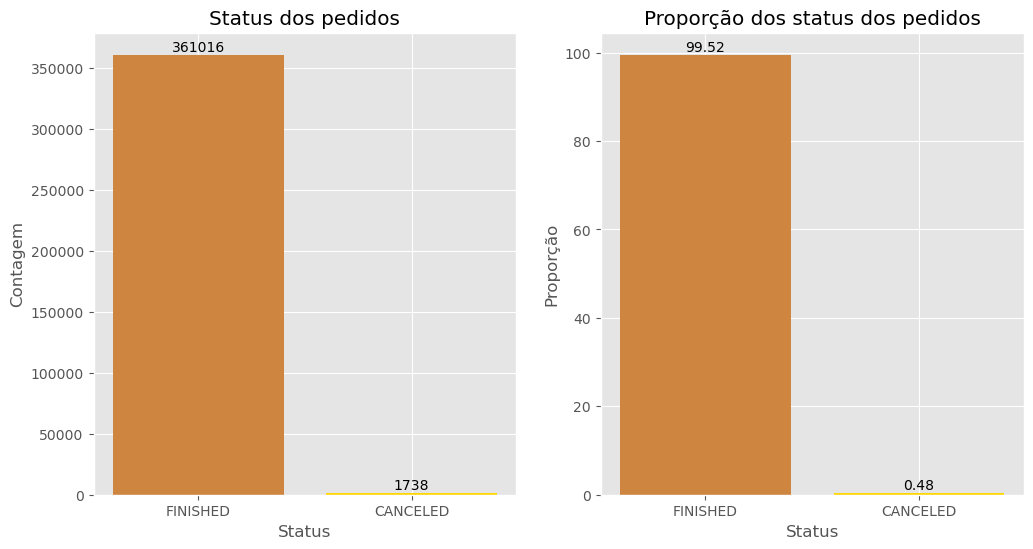

In [31]:
# Criação das dimensões e dos eixos
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# Gráfico 1
ax[0].bar(x = df['order_status'].value_counts().index, 
          height = df['order_status'].value_counts().values, 
          color = ['peru', 'gold'])

# Legendas e estilizações 
ax[0].set_title('Status dos pedidos')
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Contagem')
for i, v in enumerate(df['order_status'].value_counts().values):
    ax[0].text(i, v, str(v), ha = 'center', va = 'bottom')
    
# Gráfico 2
ax[1].bar(x = df['order_status'].value_counts(1).index, 
          height = df['order_status'].value_counts(1).apply(lambda x: round(x * 100, 2)).values, 
          color = ['peru', 'gold'])

# Legendas e estilizações 
ax[1].set_title('Proporção dos status dos pedidos')
ax[1].set_xlabel('Status')
ax[1].set_ylabel('Proporção')
for i, v in enumerate(df['order_status'].value_counts(1).apply(lambda x: round(x * 100, 2)).values):
    ax[1].text(i, v, str(v), ha = 'center', va = 'bottom')
    
# Plotagem
plt.show()

- Quase todos os pedidos foram finalizados.

Tentando entender como as outras variáveis se relacionam com os pedidos cancelados:

In [32]:
df.loc[df['order_status'] == 'CANCELED']

,delivery_id,delivery_order_id_x,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,order_id,store_id,channel_id,payment_order_id,delivery_order_id_y,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
430,2947308,90010144,25651,546.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90010144,631,5,90010144,90010144,CANCELED,93.70,11.9,NaN,14,14,13,4,2021,4/13/2021 2:14:51 PM,4/13/2021 2:15:08 PM,4/13/2021 2:31:23 PM,4/13/2021 2:35:36 PM,4/13/2021 2:39:17 PM,NaN,NaN,4/13/2021 4:42:59 PM,4.22,NaN,16.53,7.88,NaN,NaN,148.13,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
431,2947624,90010402,25651,1134.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90010402,631,5,90010402,90010402,CANCELED,129.25,11.9,7.00,14,16,13,4,2021,4/13/2021 2:16:13 PM,4/13/2021 2:17:08 PM,4/13/2021 2:31:59 PM,4/13/2021 2:35:17 PM,4/13/2021 2:39:19 PM,NaN,NaN,4/13/2021 4:42:42 PM,3.32,NaN,15.75,7.33,NaN,NaN,146.47,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
432,2947714,90011485,25651,393.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90011485,631,5,90011485,90011485,CANCELED,172.50,11.9,NaN,14,19,13,4,2021,4/13/2021 2:19:42 PM,4/13/2021 2:20:08 PM,4/13/2021 2:32:47 PM,4/13/2021 2:35:49 PM,4/13/2021 2:39:21 PM,NaN,NaN,4/13/2021 4:41:43 PM,3.03,NaN,13.08,6.57,NaN,NaN,142.02,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
647,2946303,90009431,26223,2144.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90009431,631,5,90009431,90009431,CANCELED,109.90,11.9,NaN,14,12,13,4,2021,4/13/2021 2:12:33 PM,4/13/2021 2:13:08 PM,NaN,NaN,NaN,4/13/2021 2:20:34 PM,NaN,4/13/2021 4:08:02 PM,NaN,NaN,NaN,NaN,NaN,107.47,115.48,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
648,2947784,90009431,26223,2144.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90009431,631,5,90009431,90009431,CANCELED,109.90,11.9,NaN,14,12,13,4,2021,4/13/2021 2:12:33 PM,4/13/2021 2:13:08 PM,NaN,NaN,NaN,4/13/2021 2:20:34 PM,NaN,4/13/2021 4:08:02 PM,NaN,NaN,NaN,NaN,NaN,107.47,115.48,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361904,2814627,87127133,11330,1953.0,DELIVERED,MOTOBOY,FREELANCE,87127133,883,9,87127133,87127133,CANCELED,34.90,7.9,5.56,23,39,30,3,2021,3/30/2021 11:39:39 PM,3/30/2021 11:39:40 PM,3/30/2021 11:39:41 PM,3/30/2021 11:41:44 PM,3/30/2021 11:46:04 PM,3/30/2021 11:46:35 PM,3/31/2021 12:09:53 AM,NaN,2.05,0.53,0.03,6.37,6.90,23.28,30.23,35,GIMA,FOOD,49.0,-22.973150,-43.370811
361936,2435351,77267269,7799,5636.0,DELIVERED,MOTOBOY,FREELANCE,77267269,2276,3,77267269,77267269,CANCELED,613.92,9.9,0.00,17,59,12,2,2021,2/12/2021 5:59:57 PM,2/12/2021 6:03:15 PM,2/12/2021 6:05:02 PM,2/12/2021 6:07:27 PM,NaN,2/12/2021 6:11:35 PM,NaN,2/12/2021 7:22:16 PM,2.40,NaN,5.08,NaN,6.55,70.68,82.32,28,LILI CISRUMACS,GOOD,29.0,-23.595775,-46.685984
361955,2500907,79392442,15210,2931.0,DELIVERED,MOTOBOY,FREELANCE,79392442,3162,1,79392442,79392442,CANCELED,76.80,0.0,0.00,15,24,22,2,2021,2/22/2021 3:24:54 PM,2/22/2021 3:24:56 PM,2/22/2021 3:26:13 PM,2/22/2021 3:29:11 PM,2/22/2021 3:29:18 PM,2/22/2021 3:32:38 PM,NaN,2/22/2021 11:11:42 PM,2.97,3.33,1.30,3.08,6.42,459.07,466.78,37,RULMACIASIS,GOOD,29.9,-23.507105,-46.718197
361969,2433143,76912811,9241,269.0,DELIVERED,BIKER,FREELANCE,76912811,2006,33,76912811,76912811,CANCELED,359.90,0.0,6.00,19,46,10,2,2021,2/10/2021 7:46:29 PM,2/12/2021 2:02:03 PM,2/12/2021 2:22:23 PM,2/12/2021 2:22:58 PM,2/12/2

Vê-se que existem casos nos quais os pedidos foram cancelados, mas mesmo assim entregues. Procurando sobre a política de reembolso em empresas de delivery, nota-se que existem casos nos quais, mesmo tendo cancelado, o cliente não tem direito ao reembolso. Por exemplo, no Ifood, quando o pedido já está em trânsito e dentro do prazo de entrega estimado e quando o cliente não está presente no local de entrega, o último não pode ser ressarcido. Por sua vez, o tempo limite de atraso permitido pela empresa está entre 10 e 15 minutos. A análise ficaria mais refinada com a adição das informações de quais pedidos cancelados são entregues dentro desse intervalo pois validaria a inclusão dos demais valores presentes nessas observações:

In [33]:
df.loc[(df['order_status'] == 'CANCELED') & (df['order_moment_delivered'].isnull() == True)]

,delivery_id,delivery_order_id_x,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,order_id,store_id,channel_id,payment_order_id,delivery_order_id_y,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
430,2947308,90010144,25651,546.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90010144,631,5,90010144,90010144,CANCELED,93.70,11.9,NaN,14,14,13,4,2021,4/13/2021 2:14:51 PM,4/13/2021 2:15:08 PM,4/13/2021 2:31:23 PM,4/13/2021 2:35:36 PM,4/13/2021 2:39:17 PM,NaN,NaN,4/13/2021 4:42:59 PM,4.22,NaN,16.53,7.88,NaN,NaN,148.13,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
431,2947624,90010402,25651,1134.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90010402,631,5,90010402,90010402,CANCELED,129.25,11.9,7.0,14,16,13,4,2021,4/13/2021 2:16:13 PM,4/13/2021 2:17:08 PM,4/13/2021 2:31:59 PM,4/13/2021 2:35:17 PM,4/13/2021 2:39:19 PM,NaN,NaN,4/13/2021 4:42:42 PM,3.32,NaN,15.75,7.33,NaN,NaN,146.47,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
432,2947714,90011485,25651,393.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90011485,631,5,90011485,90011485,CANCELED,172.50,11.9,NaN,14,19,13,4,2021,4/13/2021 2:19:42 PM,4/13/2021 2:20:08 PM,4/13/2021 2:32:47 PM,4/13/2021 2:35:49 PM,4/13/2021 2:39:21 PM,NaN,NaN,4/13/2021 4:41:43 PM,3.03,NaN,13.08,6.57,NaN,NaN,142.02,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
647,2946303,90009431,26223,2144.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90009431,631,5,90009431,90009431,CANCELED,109.90,11.9,NaN,14,12,13,4,2021,4/13/2021 2:12:33 PM,4/13/2021 2:13:08 PM,NaN,NaN,NaN,4/13/2021 2:20:34 PM,NaN,4/13/2021 4:08:02 PM,NaN,NaN,NaN,NaN,NaN,107.47,115.48,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
648,2947784,90009431,26223,2144.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,90009431,631,5,90009431,90009431,CANCELED,109.90,11.9,NaN,14,12,13,4,2021,4/13/2021 2:12:33 PM,4/13/2021 2:13:08 PM,NaN,NaN,NaN,4/13/2021 2:20:34 PM,NaN,4/13/2021 4:08:02 PM,NaN,NaN,NaN,NaN,NaN,107.47,115.48,28,IUMPICA,FOOD,NaN,-23.595775,-46.685984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361612,2233271,70689415,32263,5414.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,70689415,1992,3,70689415,70689415,CANCELED,1309.98,9.9,0.0,17,58,11,1,2021,1/11/2021 5:58:52 PM,1/11/2021 5:59:06 PM,1/11/2021 5:59:44 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,43,CZALLA PUIMS,GOOD,29.0,-25.441221,-49.277690
361702,2835920,87411547,4692,4623.0,DELIVERED,MOTOBOY,FREELANCE,87411547,2658,3,87411547,87411547,CANCELED,66.70,9.9,0.0,14,35,1,4,2021,4/1/2021 2:35:32 PM,4/1/2021 2:35:34 PM,4/1/2021 5:03:16 PM,NaN,NaN,4/1/2021 8:20:17 PM,NaN,4/3/2021 5:20:09 PM,NaN,NaN,147.73,NaN,197.02,2699.85,3044.62,75,LUI CISRUMACIS,GOOD,29.0,-25.477073,-49.289660
361936,2435351,77267269,7799,5636.0,DELIVERED,MOTOBOY,FREELANCE,77267269,2276,3,77267269,77267269,CANCELED,613.92,9.9,0.0,17,59,12,2,2021,2/12/2021 5:59:57 PM,2/12/2021 6:03:15 PM,2/12/2021 6:05:02 PM,2/12/2021 6:07:27 PM,NaN,2/12/2021 6:11:35 PM,NaN,2/12/2021 7:22:16 PM,2.40,NaN,5.08,NaN,6.55,70.68,82.32,28,LILI CISRUMACS,GOOD,29.0,-23.595775,-46.685984
361955,2500907,79392442,15210,2931.0,DELIVERED,MOTOBOY,FREELANCE,79392442,3162,1,79392442,79392442,CANCELED,76.80,0.0,0.0,15,24,22,2,2021,2/22/2021 3:24:54 PM,2/22/2021 3:24:56 PM,2/22/2021 3:26:13 PM,2/22/2021 3:29:11 PM,2/22/2021 3:29:18 PM,2/22/2021 3:32:38 PM,NaN,2/22/2021 11:11:42 PM,2.97,3.33,1.30,3.08,6.42,459.07,466.78,37

Contudo, a coluna "order_moment_delivery" contém apenas 1307 valores não-nulos dentre 1738 observações existentes em um dataset com mais de 360 mil pedidos. Dessa forma, a análise trabalhará apenas com os pedidos efetivamente finalizados e algumas colunas serão excluídas por não auxiliarem mais na análise:

In [34]:
df = df.loc[df['order_status'] == 'FINISHED']
print(df['order_status'].unique())

['FINISHED']


In [35]:
# Encontrando colunas
print(orders.columns)
print(stores.columns)

Index(['order_id', 'store_id', 'channel_id', 'payment_order_id',
       'delivery_order_id', 'order_status', 'order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_created', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time', 'order_metric_transit_time',
       'order_metric_cycle_time'],
      dtype='object')
Index(['store_id', 'hub_id', 'store_name', 'store_segment', 'store_plan_price',
       'store_latitude', 'store_longitude'],
      dtype='object')


In [36]:
df.drop(columns = ['order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_created', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time', 'order_metric_transit_time',
       'order_metric_cycle_time', 'store_plan_price', 'store_latitude', 'store_longitude'], inplace = True)
print(df.columns)

Index(['delivery_id', 'delivery_order_id_x', 'driver_id',
       'delivery_distance_meters', 'delivery_status', 'driver_modal',
       'driver_type', 'order_id', 'store_id', 'channel_id', 'payment_order_id',
       'delivery_order_id_y', 'order_status', 'order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'hub_id', 'store_name',
       'store_segment'],
      dtype='object')


Verificando os valores nulos:

In [37]:
df.isnull().sum()

delivery_id                    0
delivery_order_id_x            0
driver_id                      0
delivery_distance_meters      29
delivery_status                0
                            ... 
order_delivery_fee             0
order_delivery_cost         3438
hub_id                         0
store_name                     0
store_segment                  0
Length: 19, dtype: int64

Olhando, agora, para a variável "store_segment":

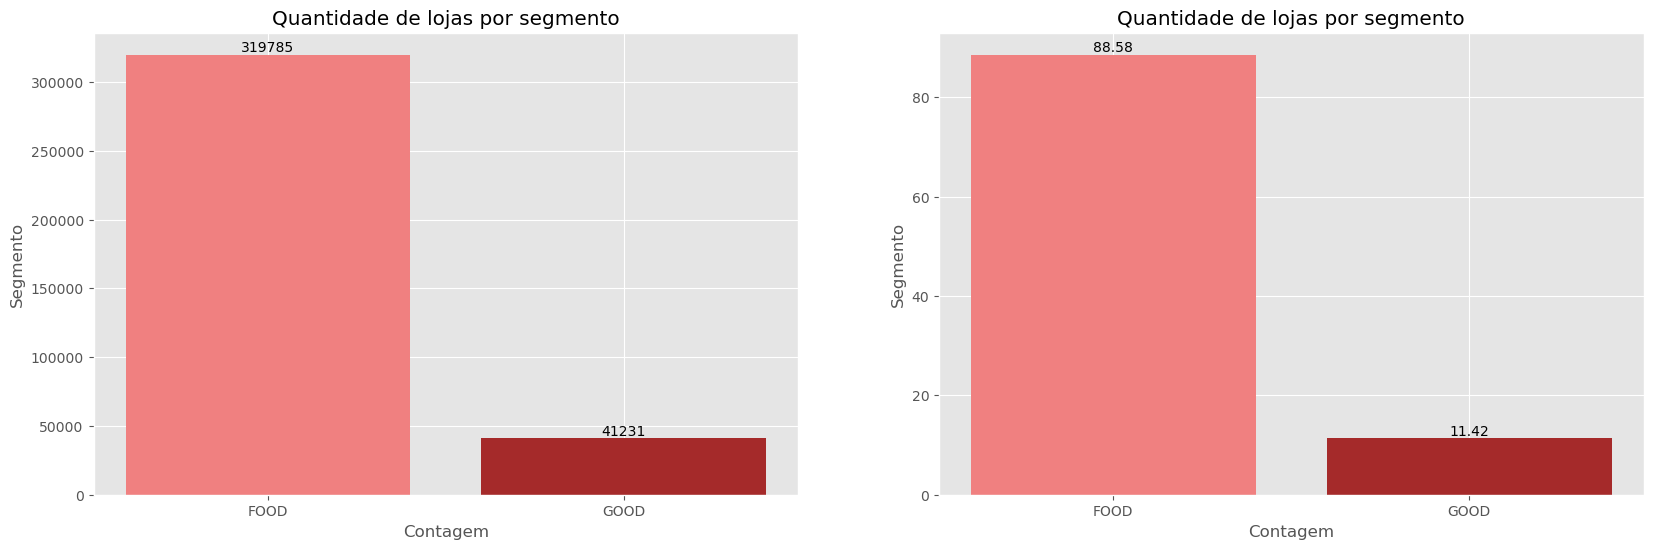

In [38]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

# Gráfico 1
ax[0].bar(x = df['store_segment'].value_counts().index, 
          height = df['store_segment'].value_counts().values,
          color = ['lightcoral', 'brown'])

# Legendas e estilizações
ax[0].set_title('Quantidade de lojas por segmento')
ax[0].set_xlabel('Contagem')
ax[0].set_ylabel('Segmento')
for i, v in enumerate(df['store_segment'].value_counts().values):
    ax[0].text(i, v, str(v), ha = 'center', va = 'bottom')

# Gráfico 2
ax[1].bar(x = df['store_segment'].value_counts(1).index, 
          height = df['store_segment'].value_counts(1).apply(lambda x: round(x * 100, 2)),
          color = ['lightcoral', 'brown'])

# Legendas e estilizações
ax[1].set_title('Quantidade de lojas por segmento')
ax[1].set_xlabel('Contagem')
ax[1].set_ylabel('Segmento')
for i, v in enumerate(df['store_segment'].value_counts(1).apply(lambda x: round(x * 100, 2))):
    ax[1].text(i, v, str(v), ha = 'center', va = 'bottom')
    
# Plotagem 
plt.show()

- Quase 320 mil lojas vendem food, ou aproximadamente 89%.
- 41231 lojas vendem good, ou cerca de 11%.

Podemos utilizar essa variável, agora, para ver se ela ajuda na compreensão dos outliers de "delivery_distance_meters":

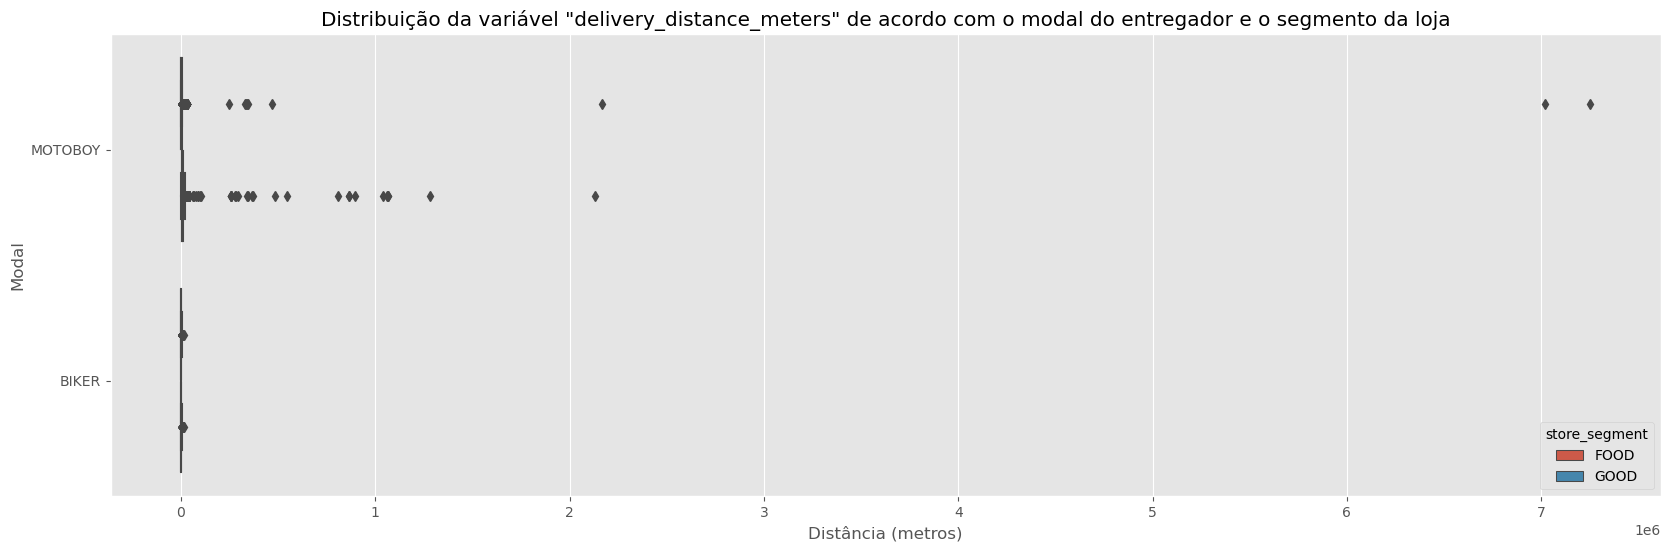

In [39]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (20, 6))

# Boxplot
sns.boxplot(data = df, 
            x = 'delivery_distance_meters', 
            y = 'driver_modal', 
            hue = 'store_segment')

# Legendas e estilizações
plt.title('Distribuição da variável "delivery_distance_meters" de acordo com o modal do entregador e o segmento da loja')
plt.xlabel('Distância (metros)')
plt.ylabel('Modal')

# Plotagem
plt.show()

Debruçando-se sobre as distâncias percorridas pelos motoboys de acordo com o segmento da loja:

In [40]:
percentil_99_good = df.loc[(df['driver_modal'] == 'MOTOBOY') & (df['store_segment'] == 'GOOD')]\
['delivery_distance_meters'].quantile(0.99).round(2)
print('Distância maior do que 99% das outras percorrida pelos motoboys que entregam goods:')
print(percentil_99_good)
percentil_99_food = df.loc[(df['driver_modal'] == 'MOTOBOY') & (df['store_segment'] == 'FOOD')]\
['delivery_distance_meters'].quantile(0.99).round(2)
print('Distância maior do que 99% das outras percorrida pelos motoboys que entregam foods:')
print(percentil_99_food)

Distância maior do que 99% das outras percorrida pelos motoboys que entregam goods:
27085.9
Distância maior do que 99% das outras percorrida pelos motoboys que entregam foods:
6930.0


Olhando mais detidamente:

In [41]:
print('Dados dos motoboys que percorrem uma distância maior do que 99% das outrase e que entregam foods:')
print(df[df['delivery_distance_meters'] > percentil_99_food])

Dados dos motoboys que percorrem uma distância maior do que 99% das outrase e que entregam foods:
        delivery_id  delivery_order_id_x  driver_id  delivery_distance_meters  \
6749        2402446             76260801       6657                    6998.0   
6931        2447103             77663806       7799                    6950.0   
7348        2603286             82255270      27747                    7022.0   
7771        2392686             75992322       9317                    6956.0   
7933        2412294             76569770      33556                    7022.0   
...             ...                  ...        ...                       ...   
362727      3005666             91493666      51705                    8009.0   
362741      3078690             93099519      42113                   13261.0   
362748      2950200             90064310      59757                   11173.0   
362749      3059456             92748522      58173                   11009.0   
362750     

15259 entregas de foods feitas por motoboys têm distâncias superiores a aproximadamente 7 km, o que não ajuda a compreender os outliers pois é uma distância pequena a ser percorrida por uma moto. Por isso, e por serem bastantes observações, elas não serão retiradas com base nesse critério. Por sua vez, em relação aos goods:

In [42]:
print('Dados dos motoboys que percorrem uma distância maior do que 99% das outras e que entregam goods:')
print(df[df['delivery_distance_meters'] > percentil_99_good])

Dados dos motoboys que percorrem uma distância maior do que 99% das outras e que entregam goods:
        delivery_id  delivery_order_id_x  driver_id  delivery_distance_meters  \
13717       2616676             82587324      22749                   29710.0   
53629       2422149             76889808      15898                 7251291.0   
58931       2304733             73230527       7549                   96363.0   
64055       2318571             72809442       7396                   30096.0   
64056       2323616             73745224       7396                   29365.0   
...             ...                  ...        ...                       ...   
361212      3073054             92998776        598                   29448.0   
361338      2849858             87708047      20248                 1062554.0   
361487      2711759             85004479       6952                   29612.0   
361699      2503349             79436677       4692                 1066176.0   
362162      

396 observações têm distâncias superiores a aproximadamente 27 km. É plausível que algumas entregas possam ter, de fato, essas distâncias e até um pouco mais. Estabelecerei 40 km pois é uma distância grande a ser percorrida em uma cidade média ou grande, além de ser uma distância que pode ser percorrida entre cidades vizinhas. Logo, observações acima de 40 km serão excluídas: 

In [43]:
df = df.loc[df['delivery_distance_meters'] <= 40000.0]
print(df['delivery_distance_meters'].max())

36823.0


Olhando as medidas de posição e de dispersão graficamente:

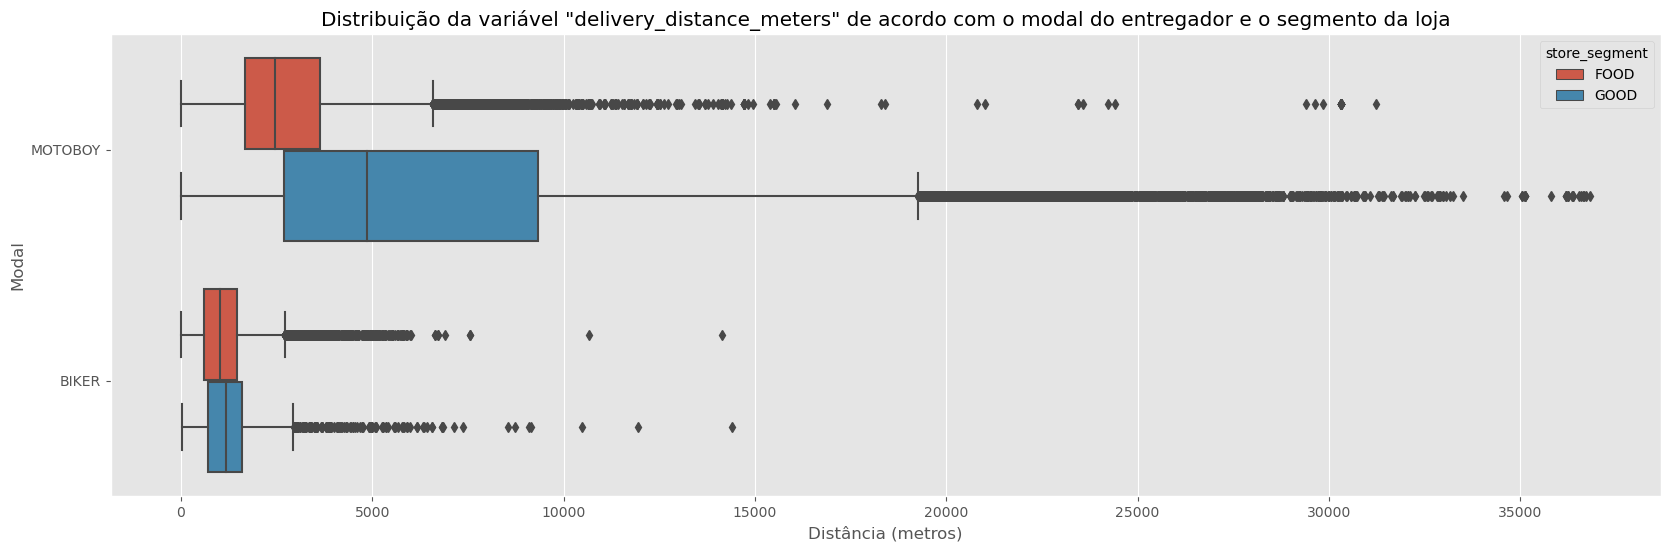

In [44]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (20, 6))

# Boxplot
sns.boxplot(data = df, 
            x = 'delivery_distance_meters', 
            y = 'driver_modal', 
            hue = 'store_segment')

# Legendas e estilizações
plt.title('Distribuição da variável "delivery_distance_meters" de acordo com o modal do entregador e o segmento da loja')
plt.xlabel('Distância (metros)')
plt.ylabel('Modal')

# Plotagem
plt.show()

Apesar das distâncias superiores a aproximadamente 17 km terem sido retiradas por serem demasiadamente altas para ciclistas, percebe-se que existem 5 dados que isolados depois de 10 km. Olhando-os detalhamente:

In [45]:
df.loc[(df['driver_modal'] == 'BIKER') & (df['delivery_distance_meters'] > 10000)]

,delivery_id,delivery_order_id_x,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,order_id,store_id,channel_id,payment_order_id,delivery_order_id_y,order_status,order_amount,order_delivery_fee,order_delivery_cost,hub_id,store_name,store_segment
24510,2806705,86901663,15338,10490.0,DELIVERED,BIKER,FREELANCE,86901663,1103,46,86901663,86901663,FINISHED,65.90,0.0,9.19,27,SALITO,GOOD
136856,2546219,80655283,15915,14149.0,DELIVERED,BIKER,FREELANCE,80655283,604,10,80655283,80655283,FINISHED,145.60,9.9,11.29,16,SIRVUMU AMILAI,FOOD
244431,2775356,86376294,15636,11936.0,DELIVERED,BIKER,FREELANCE,86376294,3172,3,86376294,86376294,FINISHED,72.85,10.0,15.39,44,ZIVIMUI,GOOD
346642,2867307,88041535,938,10665.0,DELIVERED,BIKER,FREELANCE,88041535,4012,5,88041535,88041535,FINISHED,135.90,0.0,10.37,13,CICI PIRPU,FOOD
355718,2892097,88451660,41283,14387.0,DELIVERED,BIKER,FREELANCE,88451660,1608,3,88451660,88451660,FINISHED,199.98,10.0,33.50,17,CZALLA PUIMS LISI,GOOD


Eles também serão retirados por destoarem dos demais. Assim, nesse conjunto de dados, a distância percorrida por ciclistas é menor ou igual a 10 km e aquela percorrida por motoboys é inferior ou igual a 40 km:

In [46]:
df.drop(df.loc[(df['driver_modal'] == 'BIKER') & (df['delivery_distance_meters'] > 10000)].index, inplace = True)

É importante, também, analisar as distâncias observadas iguais a 0:

In [47]:
df.loc[df['delivery_distance_meters'] == 0]

,delivery_id,delivery_order_id_x,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,order_id,store_id,channel_id,payment_order_id,delivery_order_id_y,order_status,order_amount,order_delivery_fee,order_delivery_cost,hub_id,store_name,store_segment
235526,2647784,83365511,9517,0.0,DELIVERED,BIKER,FREELANCE,83365511,2156,5,83365511,83365511,FINISHED,46.90,0.00,4.80,43,RO PISMUAS,FOOD
249906,2299214,73044698,12613,0.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,73044698,1633,17,73044698,73044698,FINISHED,14.19,9.90,7.18,44,PIRAGUAM,GOOD
251832,2530165,80243831,25651,0.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,80243831,3943,5,80243831,80243831,FINISHED,95.70,0.00,6.70,44,GARIOLIS,FOOD
251833,2530593,80243831,25651,0.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,80243831,3943,5,80243831,80243831,FINISHED,95.70,0.00,6.70,44,GARIOLIS,FOOD
331031,2757462,85979756,25989,0.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,85979756,4002,5,85979756,85979756,FINISHED,21.00,4.49,4.20,43,IMIA VAMOI RISI,FOOD


Elas também serão excluídas:

In [48]:
df = df.loc[df['delivery_distance_meters'] != 0]

Vendo o resumo geral dessas medidas:

In [49]:
desc2 = df.loc[df['driver_modal'] == 'MOTOBOY']['delivery_distance_meters'].describe().round(2)
desc2['var'] = df.loc[df['driver_modal'] == 'MOTOBOY']['delivery_distance_meters'].var()
desc2 = pd.DataFrame(desc2)
print('Distribuição da variável "delivery_distance_meters" para os motoboys:')
print(tabulate(desc2, headers = 'keys', tablefmt = 'fancy_grid', showindex = True))

Distribuição da variável "delivery_distance_meters" para os motoboys:
╒═══════╤════════════════════════════╕
│       │   delivery_distance_meters │
╞═══════╪════════════════════════════╡
│ count │           263852           │
├───────┼────────────────────────────┤
│ mean  │             3314.72        │
├───────┼────────────────────────────┤
│ std   │             3001.68        │
├───────┼────────────────────────────┤
│ min   │               11           │
├───────┼────────────────────────────┤
│ 25%   │             1739           │
├───────┼────────────────────────────┤
│ 50%   │             2614           │
├───────┼────────────────────────────┤
│ 75%   │             3967           │
├───────┼────────────────────────────┤
│ max   │            36823           │
├───────┼────────────────────────────┤
│ var   │                9.01006e+06 │
╘═══════╧════════════════════════════╛


- A distância média é de 3315 metros aproximandamente.
- O desvio em relação à média é muito alto, de 3001.68 metros.
- 50% das entregas têm distância entre 1739 metros e 3967 metros.
- A distância máxima observada é 36823 metros.
- A distância que separa 50% das distâncias inferiores e 50% das distâncias superiores é 2614 metros.

In [50]:
desc3 = df.loc[df['driver_modal'] == 'BIKER']['delivery_distance_meters'].describe().round(2)
desc3['var'] = df.loc[df['driver_modal'] == 'BIKER']['delivery_distance_meters'].var()
desc3 = pd.DataFrame(desc3)
print('Distribuição da variável "delivery_distance_meters" para os ciclistas:')
print(tabulate(desc3, headers = 'keys', tablefmt = 'fancy_grid', showindex = True))

Distribuição da variável "delivery_distance_meters" para os ciclistas:
╒═══════╤════════════════════════════╕
│       │   delivery_distance_meters │
╞═══════╪════════════════════════════╡
│ count │                   97076    │
├───────┼────────────────────────────┤
│ mean  │                    1073.51 │
├───────┼────────────────────────────┤
│ std   │                     598.42 │
├───────┼────────────────────────────┤
│ min   │                       3    │
├───────┼────────────────────────────┤
│ 25%   │                     616    │
├───────┼────────────────────────────┤
│ 50%   │                    1028    │
├───────┼────────────────────────────┤
│ 75%   │                    1459    │
├───────┼────────────────────────────┤
│ max   │                    9144    │
├───────┼────────────────────────────┤
│ var   │                  358106    │
╘═══════╧════════════════════════════╛


- A média de distância percorrida é aproximadamente 1074 metros.
- O desvio-padrão é de 604 metros aproximadamente.
- 50% dos ciclistas percorreram entre 616 e 1459 metros.
- A distância máxima percorrida foi 9144 metros.
- A mediana é 1028 metros aproximadamente.

# Informações dos 20 entregadores que possuem maior distância percorrida

Ela será apresentada em km. Os entregadores serão separados por modal na medida que existe uma discrepância muito grande entre as distâncias percorridas de moto e de bicicleta:

In [51]:
top_distance_motoboy = df.loc[df['driver_modal'] == 'MOTOBOY'].groupby(['driver_id', 'driver_type'])\
['delivery_distance_meters'].sum().apply(lambda x: round(x / 1000, 2)).sort_values(ascending = False)[:20].reset_index()
top_distance_motoboy.columns = ['Driver ID', 'Driver Type', 'Total Delivery Distance (km)']
print('Os 20 motoboys com maior distância total percorrida:')
print(top_distance_motoboy)

Os 20 motoboys com maior distância total percorrida:
    Driver ID        Driver Type  Total Delivery Distance (km)
0       26223  LOGISTIC OPERATOR                      59437.92
1       25651  LOGISTIC OPERATOR                      31922.57
2       31023          FREELANCE                       6075.22
3       11063          FREELANCE                       4822.55
4       17749          FREELANCE                       3957.62
..        ...                ...                           ...
15       9806  LOGISTIC OPERATOR                       2965.84
16      26536          FREELANCE                       2902.05
17       6952          FREELANCE                       2890.24
18      41924  LOGISTIC OPERATOR                       2790.16
19      11887          FREELANCE                       2738.39

[20 rows x 3 columns]


Destrinchando melhor as informações desses 20 entregadores:

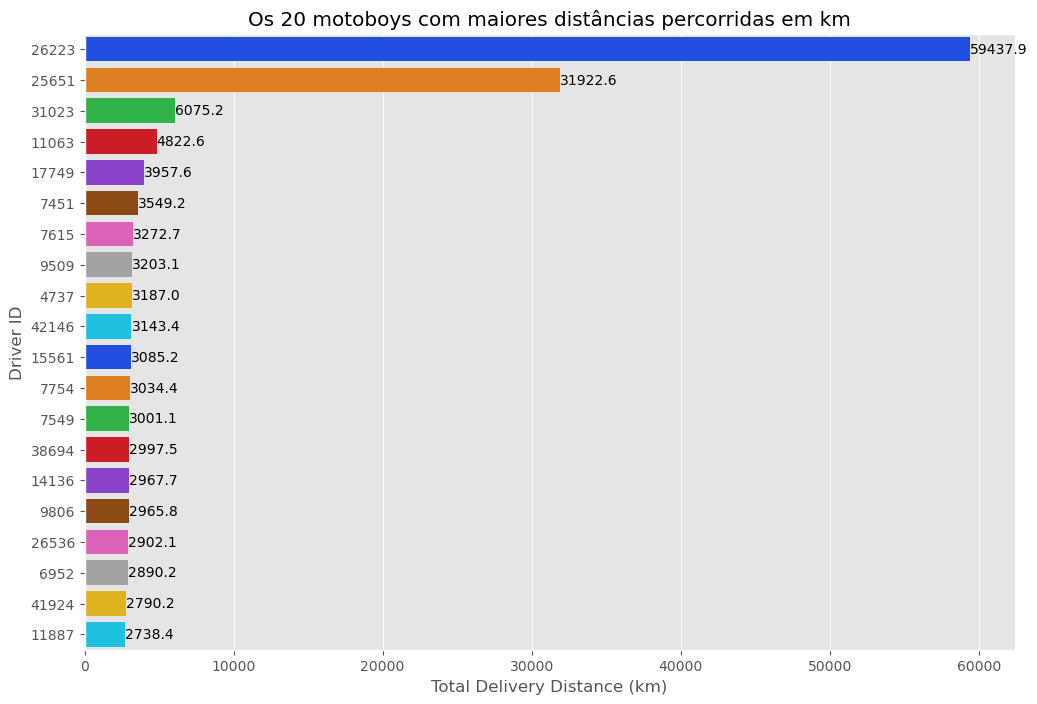

In [52]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (12, 8))

# Paleta de cores
custom_palette = sns.color_palette('bright', 20)

# Gráfico 
sns.barplot(y = top_distance_motoboy['Driver ID'].astype('str'), 
            x = top_distance_motoboy['Total Delivery Distance (km)'], 
            palette = custom_palette)

# Legendas e estilizações
ax.set_title('Os 20 motoboys com maiores distâncias percorridas em km')
ax.set_ylabel('Driver ID')
ax.set_xlabel('Total Delivery Distance (km)')
for i, v in enumerate(top_distance_motoboy['Total Delivery Distance (km)']):
    ax.text(v, i, f'{v:.1f}', ha = 'left', va = 'center')

# Plotagem
plt.show()

- Os motoboys de identidade 26223 e 25651 se destacam no ranking.

In [53]:
desc4 = top_distance_motoboy['Total Delivery Distance (km)'].describe().round(2)
desc4 = pd.DataFrame(desc4)
print('Medidas de posição e dispersão dos 20 motoboys que percorreram mais quilômetros:')
print(tabulate(desc4, headers = 'keys', tablefmt = 'fancy_grid', showindex = True))

Medidas de posição e dispersão dos 20 motoboys que percorreram mais quilômetros:
╒═══════╤════════════════════════════════╕
│       │   Total Delivery Distance (km) │
╞═══════╪════════════════════════════════╡
│ count │                          20    │
├───────┼────────────────────────────────┤
│ mean  │                        7597.2  │
├───────┼────────────────────────────────┤
│ std   │                       13790.5  │
├───────┼────────────────────────────────┤
│ min   │                        2738.39 │
├───────┼────────────────────────────────┤
│ 25%   │                        2967.23 │
├───────┼────────────────────────────────┤
│ 50%   │                        3114.33 │
├───────┼────────────────────────────────┤
│ 75%   │                        3651.29 │
├───────┼────────────────────────────────┤
│ max   │                       59437.9  │
╘═══════╧════════════════════════════════╛


- A média de distância desse top 20 é aproximadamente 7597 km
- O desvio em relação à média é de 13790.5 km
- 10 motoboys percorreram entre 2967.23 e 3651.29 km
- O mínimo percorrido foi 2738.39 km
- O máximo percorrido foi 59437.9 km

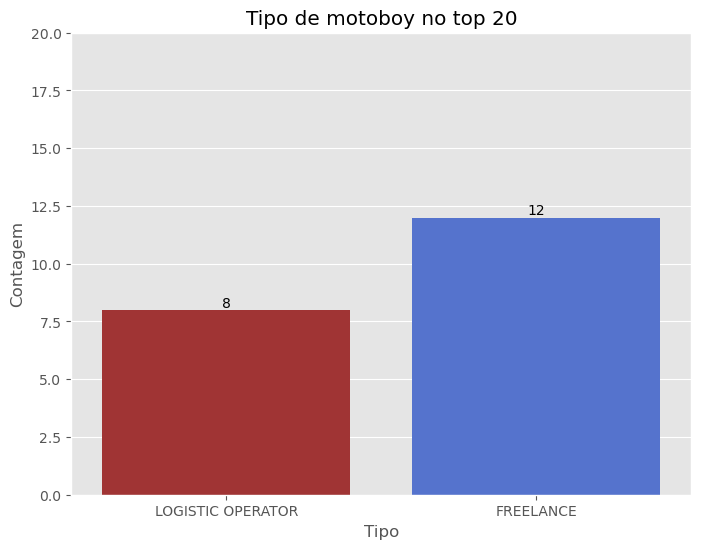

In [54]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico de colunas 1
sns.countplot(data = top_distance_motoboy, 
              x = 'Driver Type',
              palette = ['firebrick', 'royalblue'])

# Legendas e estilizações
ax.set_title('Tipo de motoboy no top 20')
ax.set_ylabel('Contagem')
ax.set_xlabel('Tipo')
ax.set_ylim(0, 20)
for i, v in enumerate(top_distance_motoboy['Driver Type'].value_counts().reindex(['LOGISTIC OPERATOR', 'FREELANCE'])):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom')

# Plotagem
plt.show()

Em frequência relativa:

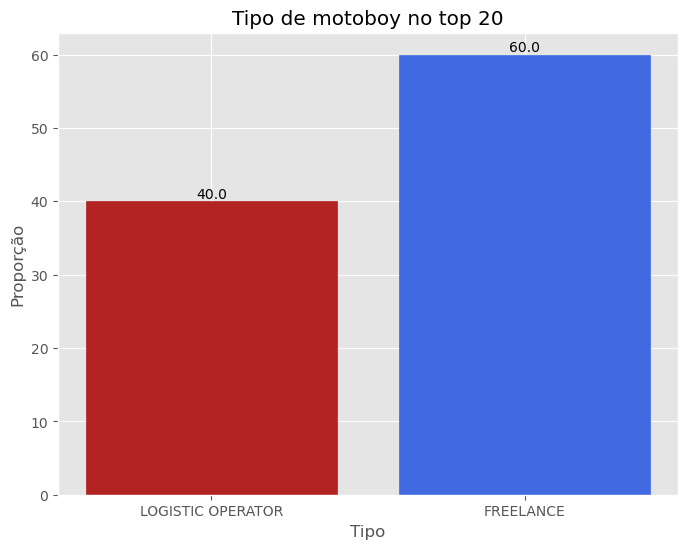

In [55]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de colunas
sns.histplot(data = top_distance_motoboy, 
             x = 'Driver Type', 
             stat = 'percent', 
             shrink = 0.8)

# Legendas e estilizações
ax.set_title('Tipo de motoboy no top 20')
ax.set_ylabel('Proporção')
ax.set_xlabel('Tipo')

# Definindo cores diferentes para as barras
colors = ['firebrick', 'royalblue']
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Calculando as coordenadas das barras
bars = ax.patches
bar_x = [bar.get_x() + bar.get_width() / 2 for bar in bars]
bar_height = [bar.get_height() for bar in bars]

# Adicionando as porcentagens
for x, h in zip(bar_x, bar_height):
    ax.text(x, h, f'{h:.1f}', ha = 'center', va = 'bottom')

- 60% dos entregadores é do tipo freelance e 40% é do tipo logistic operator.

Para os ciclistas:

In [56]:
top_distance_biker = df.loc[df['driver_modal'] == 'BIKER'].groupby(['driver_id', 'driver_type'])\
['delivery_distance_meters'].sum().apply(lambda x: round(x / 1000, 2)).sort_values(ascending = False).reset_index()
top_distance_biker.columns = ['Driver ID', 'Driver Type', 'Total Delivery Distance (km)']
top_distance_biker = top_distance_biker.sort_values(by = 'Total Delivery Distance (km)', ascending = False)[:20]
print('Os 20 ciclistas com maior distância total percorrida:')
print(top_distance_biker)

Os 20 ciclistas com maior distância total percorrida:
    Driver ID Driver Type  Total Delivery Distance (km)
0        3780   FREELANCE                        862.59
1         794   FREELANCE                        835.11
2       12724   FREELANCE                        730.21
3        7638   FREELANCE                        719.45
4       18487   FREELANCE                        619.06
..        ...         ...                           ...
15       8592   FREELANCE                        522.51
16       5364   FREELANCE                        521.55
17      12023   FREELANCE                        501.88
18        196   FREELANCE                        500.91
19      11941   FREELANCE                        500.74

[20 rows x 3 columns]


Destrinchando as informações desses 20 ciclistas:

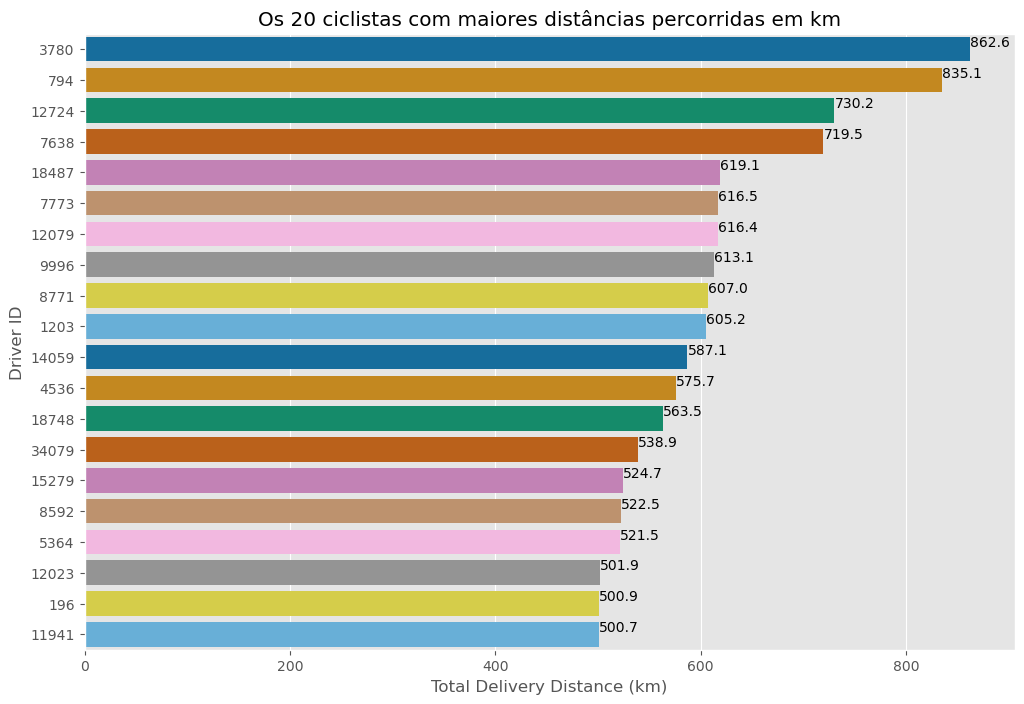

In [57]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (12, 8))

# Paleta de cores
custom_palette = sns.color_palette('colorblind')

# Gráfico 
sns.barplot(y = top_distance_biker['Driver ID'].astype('str'), 
            x = top_distance_biker['Total Delivery Distance (km)'], 
            palette = custom_palette)

# Legendas e estilizações
ax.set_title('Os 20 ciclistas com maiores distâncias percorridas em km')
ax.set_ylabel('Driver ID')
ax.set_xlabel('Total Delivery Distance (km)')
for i, v in enumerate(top_distance_biker['Total Delivery Distance (km)']):
    ax.text(v, i, f'{v:.1f}', ha = 'left', va = 'bottom')

# Plotagem
plt.show()

- Vê-se que as distâncias percorridas pelos ciclistas são mais aproximadas, embora os 4 primeiros se destaquem mais.

In [58]:
desc5 = top_distance_biker['Total Delivery Distance (km)'].describe().round(2)
desc5 = pd.DataFrame(desc5)
print('Medidas de posição e dispersão dos 20 ciclistas que percorreram mais quilômetros:')
print(tabulate(desc5, headers = 'keys', tablefmt = 'fancy_grid', showindex = True))

Medidas de posição e dispersão dos 20 ciclistas que percorreram mais quilômetros:
╒═══════╤════════════════════════════════╕
│       │   Total Delivery Distance (km) │
╞═══════╪════════════════════════════════╡
│ count │                          20    │
├───────┼────────────────────────────────┤
│ mean  │                         608.11 │
├───────┼────────────────────────────────┤
│ std   │                         104.69 │
├───────┼────────────────────────────────┤
│ min   │                         500.74 │
├───────┼────────────────────────────────┤
│ 25%   │                         524.12 │
├───────┼────────────────────────────────┤
│ 50%   │                         596.16 │
├───────┼────────────────────────────────┤
│ 75%   │                         617.13 │
├───────┼────────────────────────────────┤
│ max   │                         862.59 │
╘═══════╧════════════════════════════════╛


- A média de distância é de 608.11 km
- O desvio em relação à média é 104.69 km
- 10 ciclistas percorreram 524.12 km e 617.13 km
- O mínimo percorrido foi 500.74 km
- O máximo percorrido foi 862.59 km

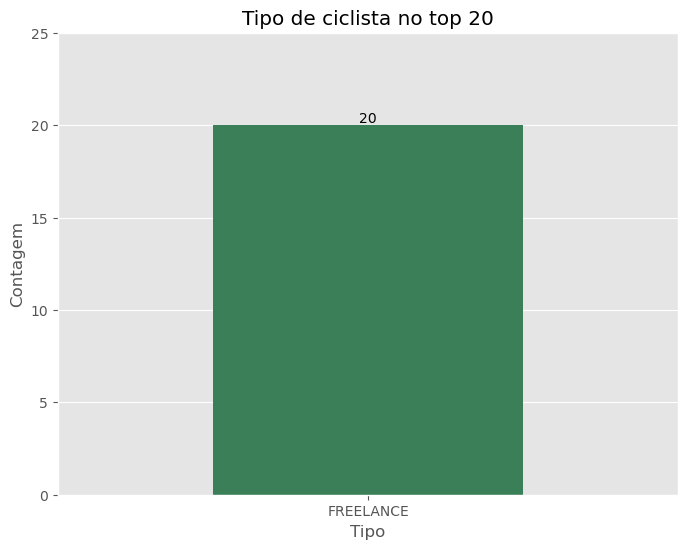

In [59]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico de colunas 1
sns.countplot(data = top_distance_biker, 
              x = 'Driver Type', 
              width = 0.5, 
              color = 'seagreen')

# Legendas e estilizações
ax.set_title('Tipo de ciclista no top 20')
ax.set_ylabel('Contagem')
ax.set_xlabel('Tipo')
ax.set_ylim(0, 25)
for i, v in enumerate(top_distance_biker['Driver Type'].value_counts()):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom')

# Plotagem
plt.show()

- Todos os ciclistas são freelancers.

# Distribuição da distância média percorrida pelos motoqueiros por estado

O time de Pricing precisa da distribuição da distância média percorrida pelos motoqueiros separada por estado, já que cada região terá seu preço. Entretanto, a mediana será utilizada na medida que muitas distâncias discrepantes foram mantidas para manter a fidelidade dos dados ao máximo, de modo que a média será influenciada por esse valores extremos. Além disso, eles serão separados pelo segmento da loja também visto que a distância percorrida pelos motociclistas que realizam entregas de good é bem diferente daquela realizada quando se entrega food. Primeiro, é necessário importar outra tabela e unir com a já existente:

In [60]:
hubs = pd.read_csv('hubs.csv', encoding_errors = 'replace')
df2 = df.merge(hubs, how = 'inner', on = 'hub_id')
print(df2.head())

   delivery_id  delivery_order_id_x  driver_id  delivery_distance_meters  \
0      2174658             68413340       8378                    5199.0   
1      2174663             68412721       8378                    5714.0   
2      2175302             68423436       8378                    5052.0   
3      2175636             68457718       8378                    3249.0   
4      2175640             68457071       8378                    3693.0   

  delivery_status driver_modal driver_type  order_id  store_id  channel_id  \
0       DELIVERED      MOTOBOY   FREELANCE  68413340       631           5   
1       DELIVERED      MOTOBOY   FREELANCE  68412721       631           5   
2       DELIVERED      MOTOBOY   FREELANCE  68423436       631           5   
3       DELIVERED      MOTOBOY   FREELANCE  68457718       631           5   
4       DELIVERED      MOTOBOY   FREELANCE  68457071       631           5   

   payment_order_id  delivery_order_id_y order_status  order_amount  \
0  

Verificando os valores nulos existentes:

In [61]:
df2.isnull().sum()

delivery_id                 0
delivery_order_id_x         0
driver_id                   0
delivery_distance_meters    0
delivery_status             0
                           ..
hub_name                    0
hub_city                    0
hub_state                   0
hub_latitude                0
hub_longitude               0
Length: 24, dtype: int64

In [62]:
f'A tabela agora tem {df2.shape[0]} observações e {df2.shape[1]} atributos.'

'A tabela agora tem 360928 observações e 24 atributos.'

Assim:

Adicionando o "store_segment":

In [63]:
median_distance_motoboy_state = df2.loc[df2['driver_modal'] == 'MOTOBOY'].\
groupby(['hub_state', 'store_segment'])['delivery_distance_meters'].median().\
apply(lambda x: round(x / 1000, 2)).reset_index()
median_distance_motoboy_state.columns = ['Hub State', 'Store Segment', 'Median Distance (km)']
median_distance_motoboy_state = median_distance_motoboy_state.pivot(index ='Hub State', columns ='Store Segment', \
                                                                    values = 'Median Distance (km)')

# Removendo os rótulos de índice e de coluna
median_distance_motoboy_state.index.name = None
median_distance_motoboy_state.columns.name = None

# Plotando
print('Mediana da distância percorrida pelos motoboys por estado e segmento de loja:')
print(median_distance_motoboy_state)

Mediana da distância percorrida pelos motoboys por estado e segmento de loja:
    FOOD  GOOD
PR  2.76  4.32
RJ  2.44  4.29
RS  2.90  5.27
SP  2.36  5.27


- As distâncias medianas percorridas em cada estado, para good, são quase o dobro daquelas percorridas para food
- O estado com maior mediana para food é o Rio Grande do Sul
- Os estados com maior mediana para good são Rio Grande do Sul e São Paulo 
- O estado com menor mediana para food é São Paulo
- O estado com menor mediana para good é o Rio de Janeiro

Precisa-se agora:
1) da receita média e total separada por tipo (Food x Good) 
2) da receita média e total por estado

Para tanto, é necessário importar outra tabela e unir novamente à já existente:

In [64]:
payments = pd.read_csv('payments.csv')
df3 = df2.merge(payments, how = 'inner', on = 'payment_order_id')
print(df3.head())

   delivery_id  delivery_order_id_x  driver_id  delivery_distance_meters  \
0      2174658             68413340       8378                    5199.0   
1      2174663             68412721       8378                    5714.0   
2      2175302             68423436       8378                    5052.0   
3      2175636             68457718       8378                    3249.0   
4      2175640             68457071       8378                    3693.0   

  delivery_status driver_modal driver_type  order_id  store_id  channel_id  \
0       DELIVERED      MOTOBOY   FREELANCE  68413340       631           5   
1       DELIVERED      MOTOBOY   FREELANCE  68412721       631           5   
2       DELIVERED      MOTOBOY   FREELANCE  68423436       631           5   
3       DELIVERED      MOTOBOY   FREELANCE  68457718       631           5   
4       DELIVERED      MOTOBOY   FREELANCE  68457071       631           5   

   payment_order_id  delivery_order_id_y order_status  order_amount  \
0  

Verificando suas dimensões gerais:

In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410609 entries, 0 to 410608
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               410609 non-null  int64  
 1   delivery_order_id_x       410609 non-null  int64  
 2   driver_id                 410609 non-null  Int64  
 3   delivery_distance_meters  410609 non-null  float64
 4   delivery_status           410609 non-null  object 
 5   driver_modal              410609 non-null  object 
 6   driver_type               410609 non-null  object 
 7   order_id                  410609 non-null  int64  
 8   store_id                  410609 non-null  int64  
 9   channel_id                410609 non-null  int64  
 10  payment_order_id          410609 non-null  int64  
 11  delivery_order_id_y       410609 non-null  int64  
 12  order_status              410609 non-null  object 
 13  order_amount              410609 non-null  f

Verificando a existência de valores nulos:

In [66]:
df3.isnull().sum()

delivery_id                 0
delivery_order_id_x         0
driver_id                   0
delivery_distance_meters    0
delivery_status             0
                           ..
payment_id                  0
payment_amount              0
payment_fee                 0
payment_method              0
payment_status              0
Length: 29, dtype: int64

In [67]:
f'A tabela "df3" tem {df3.shape[0]} observações e {df3.shape[1]} atributos.'

'A tabela "df3" tem 410609 observações e 29 atributos.'

Suporei, por falta de detalhamento, que "order_delivery_fee" já está descontado de "order_delivery_cost" e que "payment_fee" já está, também, descontado de "payment_amount". Percebe-se que o valor do pagamento ("payment_amount") é igual ao valor do pedido ("order_amount") mais o desconto da entrega ("order_delivery_cost"). Logo, tratarei "payment_amount" como receita bruta e "order_amount" como receita líquida e focarei na última:

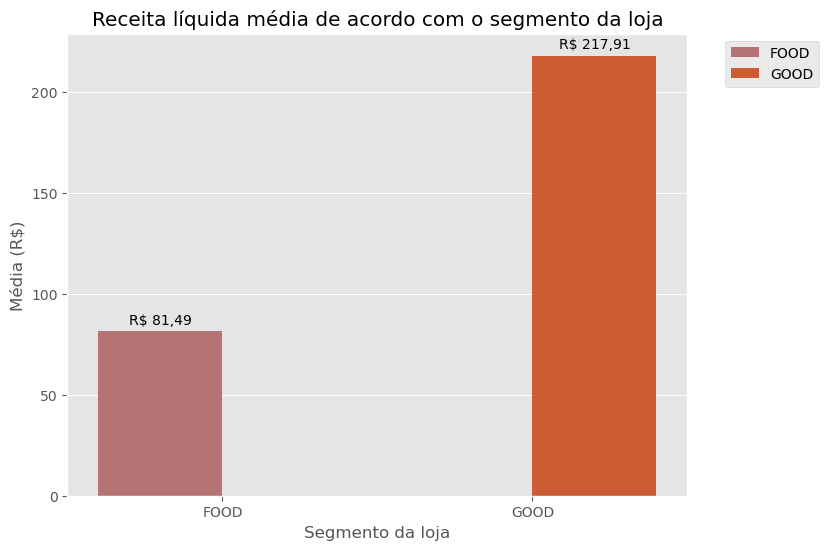

In [68]:
# Criando o objeto
receita_liquida_store_segment = df3.groupby('store_segment')['order_amount'].agg([np.mean, np.sum]).\
apply(lambda x: round(x, 2)).reset_index()

# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico de barras
sns.barplot(data = receita_liquida_store_segment, 
            x = 'store_segment', 
            y = 'mean',
            hue = 'store_segment',
            palette = ['indianred', 'orangered'], 
            saturation = 0.6)

# Legendas e estilizações
ax.set_title('Receita líquida média de acordo com o segmento da loja')
ax.set_xlabel('Segmento da loja')
ax.set_ylabel('Média (R$)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate('R$ {:,.2f}'.format(height).replace('.', ','),
                xy = (p.get_x() + p.get_width() / 2, height),
                xytext = (0, 3),
                textcoords = 'offset points',
                ha = 'center', va = 'bottom')

# Movendo a legenda para fora do gráfico
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Plotagem
plt.show()

- A receita líquida média das lojas que vendem good é quase o triplo da receita média bruta das lojas que vendem food

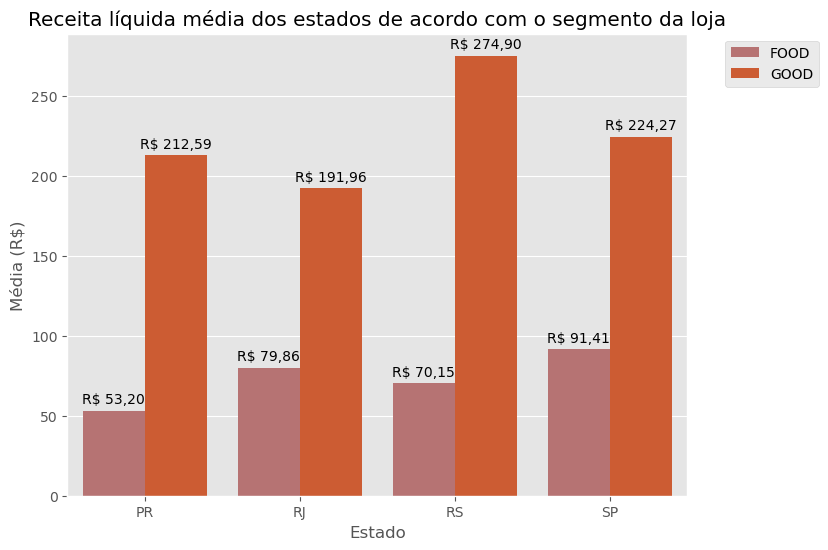

In [69]:
# Criação do objeto
receita_liquida_store_segment_state = df3.groupby(['store_segment', 'hub_state'])['order_amount'].agg([np.mean, np.sum]).\
apply(lambda x: round(x, 2)).reset_index()

# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico de barras
sns.barplot(data = receita_liquida_store_segment_state, 
            x = 'hub_state', 
            y = 'mean', 
            hue = 'store_segment', 
            palette = ['indianred', 'orangered'], 
            saturation = 0.6)

# Legendas e estilizações
ax.set_title('Receita líquida média dos estados de acordo com o segmento da loja')
ax.set_xlabel('Estado')
ax.set_ylabel('Média (R$)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate('R$ {:,.2f}'.format(height).replace('.', ','),
                xy = (p.get_x() + p.get_width() / 2, height),
                xytext = (0, 3),
                textcoords = 'offset points',
                ha = 'center', va = 'bottom')

# Movendo a legenda para fora do gráfico
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Plotagem
plt.show()

- O Rio Grande do Sul possui a maior receita líquida média e a segunda menor para os bens de tipo food.  
- O Rio de Janeiro possui a menor para os bens de tipo good e a segunda maior receita líquida média para os bens de tipo food, atrás apenas de São Paulo
- O Paraná possui a menor receita líquida média para os bens de tipo food

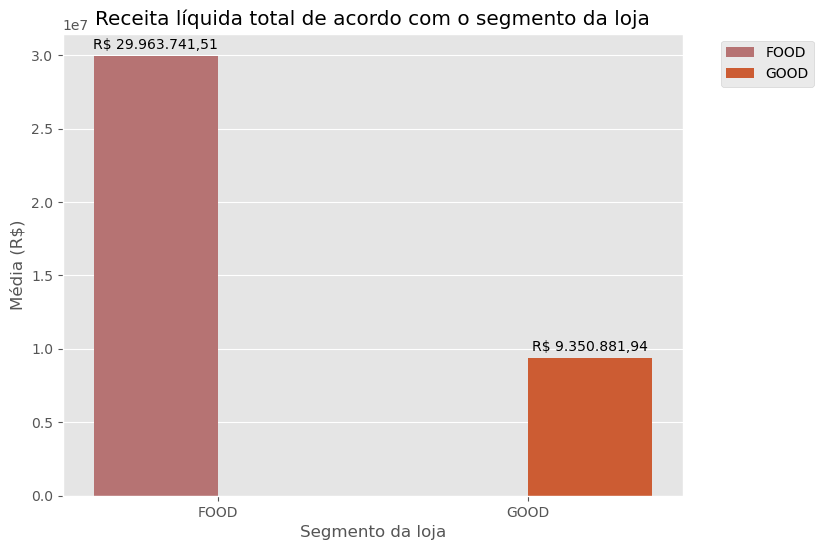

In [70]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico de barras
sns.barplot(data = receita_liquida_store_segment, 
            x = 'store_segment', 
            y = 'sum',
            hue = 'store_segment',
            palette = ['indianred', 'orangered'], 
            saturation = 0.6)

# Legendas e estilizações
ax.set_title('Receita líquida total de acordo com o segmento da loja')
ax.set_xlabel('Segmento da loja')
ax.set_ylabel('Média (R$)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate('R$ {:,.2f}'.format(height).replace(',', 'v').replace('.', ',').replace('v', '.'),
                xy = (p.get_x() + p.get_width() / 2, height),
                xytext = (0, 3),
                textcoords = 'offset points',
                ha = 'center', va = 'bottom')

# Movendo a legenda para fora do gráfico
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Plotagem
plt.show()

- Vê-se que, apesar das receitas líquidas médias serem maiores para o tipo de bem good, a receita líquida total das lojas que vendem food é aproximadamente 3 vezes maior do que aquelas que vendem good

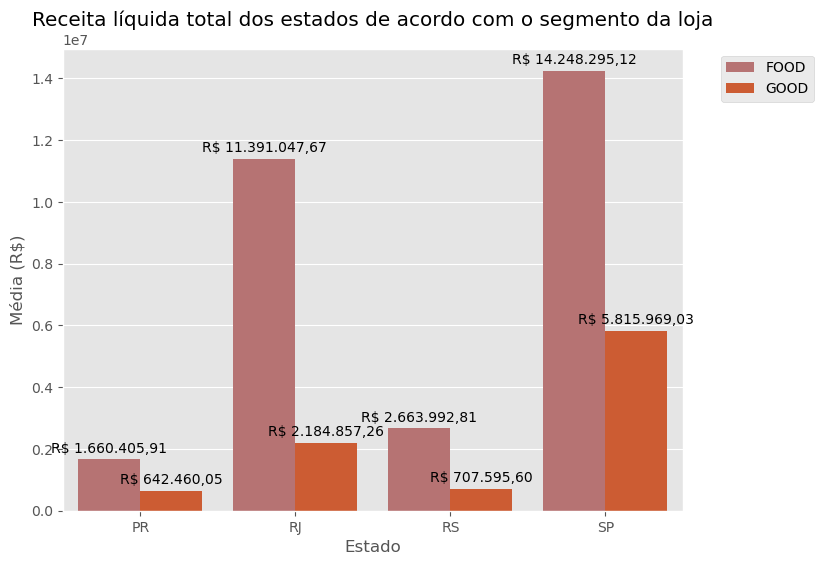

In [71]:
# Dimensionamento do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

# Gráfico de barras
sns.barplot(data = receita_liquida_store_segment_state, 
            x = 'hub_state', 
            y = 'sum', 
            hue = 'store_segment', 
            palette = ['indianred', 'orangered'], 
            saturation = 0.6)

# Legendas e estilizações
ax.set_title('Receita líquida total dos estados de acordo com o segmento da loja')
ax.set_xlabel('Estado')
ax.set_ylabel('Média (R$)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate('R$ {:,.2f}'.format(height).replace(',', 'v').replace('.', ',').replace('v', '.'),
                xy = (p.get_x() + p.get_width() / 2, height),
                xytext = (0, 3),
                textcoords = 'offset points',
                ha = 'center', va = 'bottom')

# Movendo a legenda para fora do gráfico
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Plotagem
plt.show()

- O Rio Grande do Sul, que possuía a receita líquida média mais alta para os goods, apresenta a segunda menor receita líquida total
- São Paulo e Rio de Janeiro lideram as receitas

# Conclusões Finais

- Aproximadamente 72% dos entregadores são freelancers e aproximadamente 28% são operadores de logística
- Aproximadamente 73% dos entregadores são motoboys e aproximadamente 27% são ciclistas
- Aproximadamente 89% das lojas vendem food
- Cerca de 11% das lojas vendem good
- A média de distância percorrida pelos 20 motoboys que mais fizeram deliveries é aproximadamente 7597 km
- Desses 20, 60% dos entregadores é do tipo freelance e 40% é do tipo logistic operator.
- 10 motoboys percorreram entre 2967.23 e 3651.29 km
- A média de distância percorrida pelos 20 ciclistas que mais fizeram deliveries é de 608.11 km
- Desses 20, todos são freelancers
- 10 ciclistas percorreram 524.12 km e 617.13 km
- O estado com maior distância mediana para food é o Rio Grande do Sul
- Os estados com maior mediana para good são Rio Grande do Sul e São Paulo
- O estado com menor mediana para food é São Paulo
- O estado com menor mediana para good é o Rio de Janeiro
- A receita líquida média das lojas que vendem good é quase o triplo da receita média bruta das lojas que vendem food
- O Rio Grande do Sul possui a maior receita líquida média e a segunda menor para os bens de tipo food.
- O Rio de Janeiro possui a menor para os bens de tipo good e a segunda maior receita líquida média para os bens de tipo food, atrás apenas de São Paulo
- O Paraná possui a menor receita líquida média para os bens de tipo food
- Apesar das receitas líquidas médias serem maiores para o tipo de bem good, a receita líquida total das lojas que vendem food é aproximadamente 3 vezes maior do que aquelas que vendem good
- O Rio Grande do Sul, que possuía a receita líquida média mais alta para os goods, apresenta a segunda menor receita líquida total
- São Paulo e Rio de Janeiro lideram as receitas